#### Seaborn

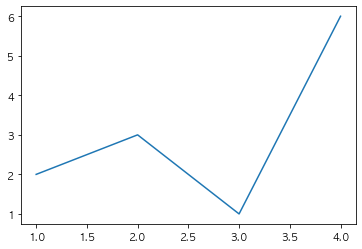

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
## 꺾은선 그래프
x = [1, 2, 3, 4]
y = [2, 3, 1, 6]
sns.lineplot(x=x, y=y)
plt.show()

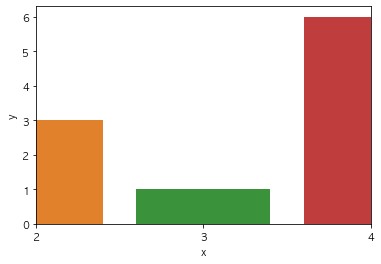

In [15]:
## 막대그래프
sns.barplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(1, 3)
plt.show()

#### 4.2 기상청 날씨 정보 시각화하기

In [16]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [23]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

driver.get('https://www.weather.go.kr/w/weather/forecast/short-term.do')
driver.implicitly_wait(10)
temps = driver.find_element(By.ID, 'my-tchart').text
temp_list = temps.replace('℃', '').split('\n')
temp_list = [int(t) for t in temp_list]

Text(0.5, 1.0, "today's temp")

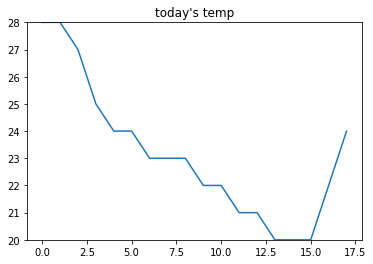

In [31]:
sns.lineplot(
    x = [i for i in range(len(temp_list))],
    y = temp_list)
plt.ylim(min(temp_list), max(temp_list))
plt.title("today's temp")

#### 해시코드 질문코드 빈도 시각화하기

In [17]:
# user_agent 추가
user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}


In [18]:
from bs4 import BeautifulSoup
import requests
import time
tag_list = []
for i in range(1, 10):
    time.sleep(0.5)
    res = requests.get(f'https://qna.programmers.co.kr//?page={i}')
    soup = BeautifulSoup(res.text, 'html.parser')
    # 1. ul 태그 선택 > 1번 안에 있는 태그의 text 추출
    ul_tags = soup.find_all('ul', 'question-tags')
    for ul in ul_tags:
        tages = ul.find_all('li')
        for li in tages:
            tag_list.append(li.text.strip())

In [19]:
dict = {}
for i in tag_list:
    dict[i] = dict.get(i, 0) + 1

In [20]:
from collections import Counter
counter = Counter(dict)
a = counter.most_common(10)
x = [i[0] for i in a]
y = [i[1] for i in a]

<AxesSubplot:>

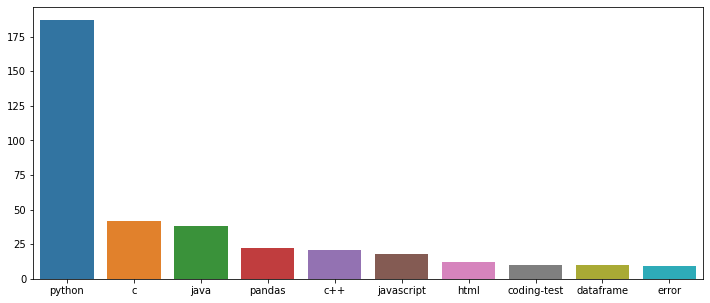

In [51]:
plt.figure(figsize=(12, 5))
sns.barplot(
    x=x,
    y=y
)

#### 4.4 뭉게뭉게 단어구름, Wordcloud

- 자주 등장하는 텍스트를 중요도나 인기도를 고려해 표현한 것
- 자연어 문장에서 키워드를 추출 
- 앞에서 전처리한 정보와 라이브러리를 바탕으로 wordcloud 생성

In [1]:
import  wordcloud
import  konlpy

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [2]:
national_anthem = """
동해물과 백두산이 마르고 닳도록
하느님이 보우하사 우리나라 만세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
남산 위에 저 소나무 철갑을 두른 듯
바람 서리 불변함은 우리 기상일세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
가을 하늘 공활한데 높고 구름 없이
밝은 달은 우리 가슴 일편단심일세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
이 기상과 이 맘으로 충성을 다하여
괴로우나 즐거우나 나라 사랑하세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
"""

In [4]:
han = Hannanum()
noun = han.nouns(national_anthem)
noun[:10]

['동해물', '백두산', '하느님', '보우하사', '우리나라', '무궁화', '삼천리', '화', '강산', '사람']

In [7]:
from matplotlib import rc


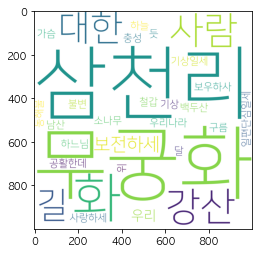

In [13]:
cloud = Counter(noun)
wordcloud = WordCloud(
    font_path='/Users/ihajun/Library/Fonts/NanumSquareL.otf',
    width=1000,
    height=1000,
    background_color='white'
)
img = wordcloud.generate_from_frequencies(cloud)
plt.imshow(img)